In [ ]:

# Products Data Exploration and Cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Products CSV file
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')

In [ ]:
# Display the first few rows of Products data
print("Products Data Head:")
print(products_df.head())

Products Data Head:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2        

In [ ]:
# Check for missing values in the Products data
print("\nMissing values in Products Data:")
print(products_df.isnull().sum())


Missing values in Products Data:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [ ]:
print(products_df.tail(5))


               CATEGORY_1                                CATEGORY_2  \
845547  Health & Wellness  Topical Muscle & Joint Relief Treatments   
845548             Snacks                                   Cookies   
845549             Snacks                                     Candy   
845550             Snacks                              Nuts & Seeds   
845551  Health & Wellness                                 First Aid   

              CATEGORY_3 CATEGORY_4           MANUFACTURER      BRAND  \
845547    Braces & Wraps        NaN                    NaN        NaN   
845548               NaN        NaN  TREEHOUSE FOODS, INC.  LOFTHOUSE   
845549  Confection Candy        NaN    HARIBO GMBH & CO KG     HARIBO   
845550         Hazelnuts        NaN         DOUBLE-COLA CO      JUMBO   
845551    First Aid Kits        NaN                     3M    NEXCARE   

             BARCODE  
845547  7.223016e+11  
845548  4.182082e+10  
845549  1.001672e+11  
845550  7.539076e+10  
845551  7.967933e+1

In [ ]:
# Check for duplicate rows in Products data
print("\nDuplicate rows in Products Data:", products_df.duplicated().sum())


Duplicate rows in Products Data: 215


In [ ]:
#  Describe Products Data for a statistical overview (to check inconsistencies in BARCODE)
print("\nStatistical summary of Products Data:")
print(products_df.describe())



Statistical summary of Products Data:
            BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13


In [ ]:
# 4. Explore the unique values in categorical columns (Category and Brand fields)
print("\nUnique values in Category columns:")
for col in ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']:
    print(f"{col} - Unique values:", products_df[col].nunique())


Unique values in Category columns:
CATEGORY_1 - Unique values: 27
CATEGORY_2 - Unique values: 121
CATEGORY_3 - Unique values: 344
CATEGORY_4 - Unique values: 127


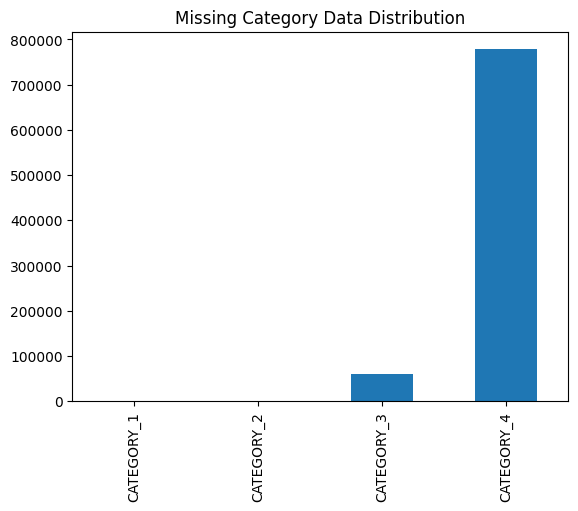

In [ ]:
# Visualizing the distribution of missing values for Categories
products_df[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']].isnull().sum().plot(kind='bar', title="Missing Category Data Distribution")
plt.show()

In [ ]:
print("\nDistribution of products by Category 1:")
print(products_df['CATEGORY_1'].value_counts())

print("\nDistribution of products by CATEGORY_2:")
print(products_df['CATEGORY_2'].value_counts())

print("\nDistribution of products by CATEGORY_3:")
print(products_df['CATEGORY_3'].value_counts())

print("\nDistribution of products by CATEGORY_4:")
print(products_df['CATEGORY_4'].value_counts())


Distribution of products by Category 1:
CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

Distribution of products by CA

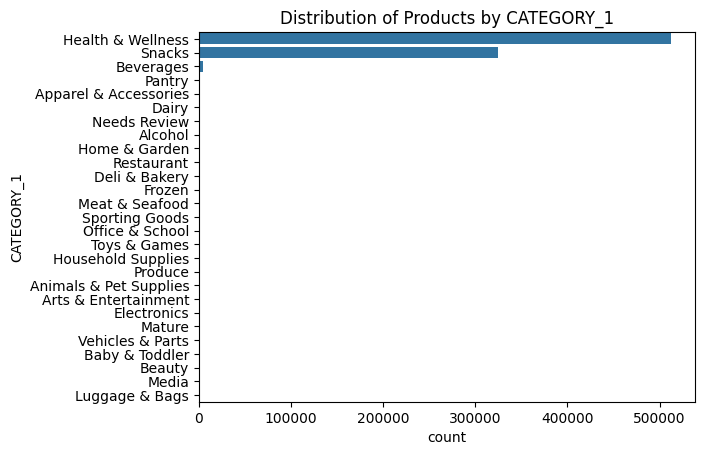

In [ ]:
# Visualize the distribution of categories
sns.countplot(y='CATEGORY_1', data=products_df, order=products_df['CATEGORY_1'].value_counts().index)
plt.title('Distribution of Products by CATEGORY_1')
plt.show()


In [ ]:
# 2. Analyzing Category-Brand relationship (Which brands dominate certain categories?)
category_brand_counts = products_df.groupby(['CATEGORY_1', 'BRAND']).size().unstack(fill_value=0)

In [ ]:

# Visualizing top brands in the most popular category
top_category = products_df['CATEGORY_1'].value_counts().idxmax()
top_category_brands = category_brand_counts.loc[top_category].sort_values(ascending=False)

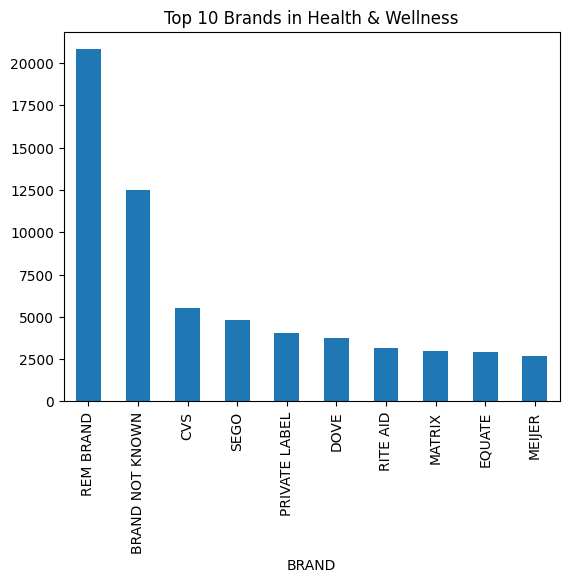

In [ ]:
top_category_brands[:10].plot(kind='bar')
plt.title(f"Top 10 Brands in {top_category}")
plt.show()

In [ ]:
# 3. Detecting outliers - Rare or infrequent categories
print("\nCategories with low representation (less than 5 products):")
rare_categories = products_df['CATEGORY_1'].value_counts()
print(rare_categories[rare_categories < 5])



Categories with low representation (less than 5 products):
CATEGORY_1
Mature              3
Vehicles & Parts    3
Baby & Toddler      3
Beauty              2
Media               2
Luggage & Bags      1
Name: count, dtype: int64


Top 10 Most Common Category Paths (CATEGORY_1 -> CATEGORY_4):
                                       category_path  count
0  Health & Wellness > Skin Care > Lip Balms & Tr...   9737
1  Snacks > Puffed Snacks > Popcorn > Already Pop...   6974
2  Health & Wellness > Medicines & Treatments > S...   4978
3  Health & Wellness > Hair Care > Hair Tools > H...   4724
4  Health & Wellness > Hair Removal > Shaving Gel...   3874
5  Health & Wellness > Hair Removal > Razors > Me...   2840
6  Health & Wellness > Medicines & Treatments > D...   2756
7  Health & Wellness > Medicines & Treatments > D...   2739
8  Health & Wellness > Medicines & Treatments > C...   2682
9  Snacks > Puffed Snacks > Popcorn > Microwave P...   2313


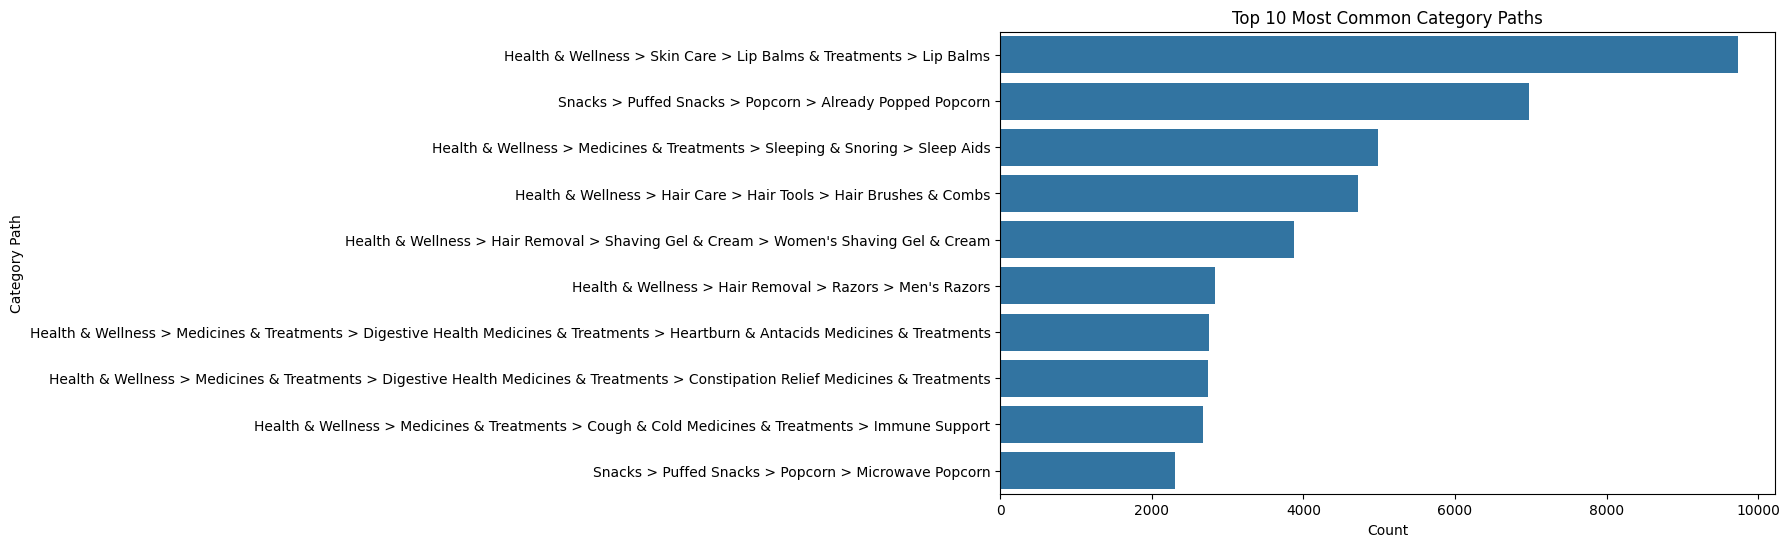

In [ ]:
# 1. Analyze the Most Common Category Paths (CATEGORY_1 -> CATEGORY_2 -> CATEGORY_3 -> CATEGORY_4)
products_df['category_path'] = products_df['CATEGORY_1'] + ' > ' + products_df['CATEGORY_2'] + ' > ' + products_df['CATEGORY_3'] + ' > ' + products_df['CATEGORY_4']

# Count unique category paths and sort by frequency
category_path_counts = products_df['category_path'].value_counts().reset_index(name='count')
category_path_counts.columns = ['category_path', 'count']

# Display top 10 most common category paths
print("Top 10 Most Common Category Paths (CATEGORY_1 -> CATEGORY_4):")
print(category_path_counts.head(10))

# Visualize the top 10 most common category paths
plt.figure(figsize=(10, 6))
sns.barplot(y='category_path', x='count', data=category_path_counts.head(10))
plt.title('Top 10 Most Common Category Paths')
plt.ylabel('Category Path')
plt.xlabel('Count')
plt.show()

In [ ]:

# 2. Evaluate Subcategory Diversity Within Each CATEGORY_1
category_1_diversity = products_df.groupby('CATEGORY_1').agg(
    subcategory_2_count=('CATEGORY_2', 'nunique'),
    subcategory_3_count=('CATEGORY_3', 'nunique'),
    subcategory_4_count=('CATEGORY_4', 'nunique')
).reset_index()

print("\nSubcategory Diversity within Each CATEGORY_1:")
print(category_1_diversity)



Subcategory Diversity within Each CATEGORY_1:
                CATEGORY_1  subcategory_2_count  subcategory_3_count  \
0                  Alcohol                    6                   13   
1   Animals & Pet Supplies                    3                    1   
2    Apparel & Accessories                    5                   14   
3     Arts & Entertainment                    3                    2   
4           Baby & Toddler                    3                    3   
5                   Beauty                    1                    1   
6                Beverages                    8                   18   
7                    Dairy                    2                    8   
8            Deli & Bakery                    1                    2   
9              Electronics                    2                    1   
10                  Frozen                    6                    6   
11       Health & Wellness                   16                  106   
12           Home

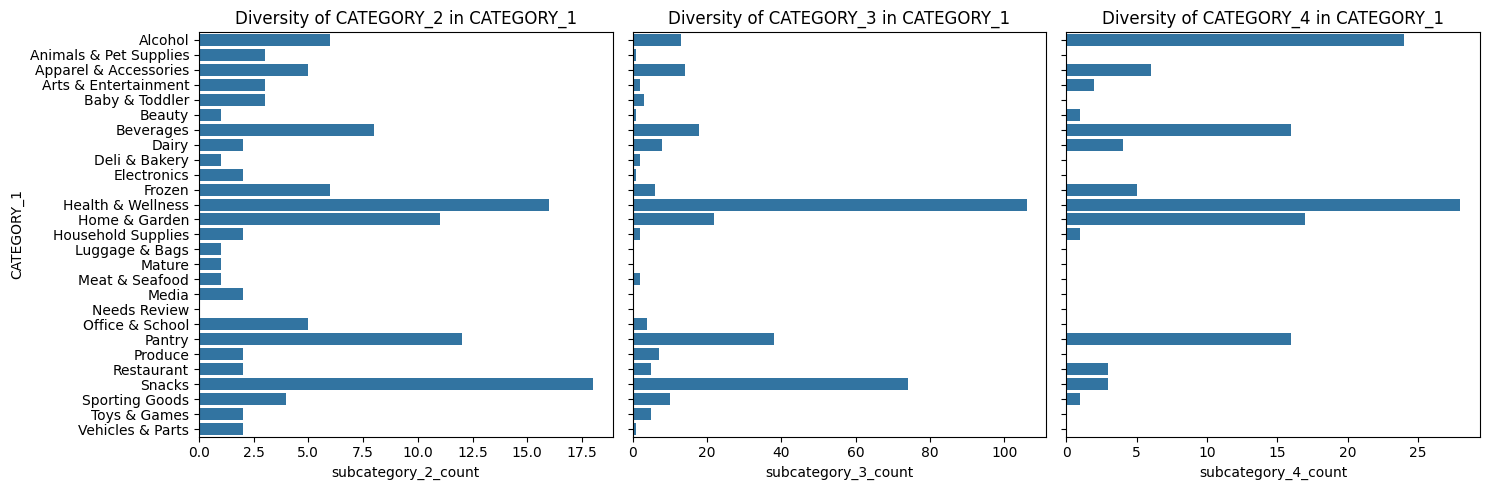

In [ ]:
# Visualizing subcategory diversity within each CATEGORY_1
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(x='subcategory_2_count', y='CATEGORY_1', data=category_1_diversity, ax=axes[0])
axes[0].set_title('Diversity of CATEGORY_2 in CATEGORY_1')

sns.barplot(x='subcategory_3_count', y='CATEGORY_1', data=category_1_diversity, ax=axes[1])
axes[1].set_title('Diversity of CATEGORY_3 in CATEGORY_1')

sns.barplot(x='subcategory_4_count', y='CATEGORY_1', data=category_1_diversity, ax=axes[2])
axes[2].set_title('Diversity of CATEGORY_4 in CATEGORY_1')

plt.tight_layout()
plt.show()


Rare category paths (appearing less than 5 times):
                                         category_path  count
78   Beverages > Water > Purified Water > Purified ...      4
79                    Alcohol > Beer > Ale > Stout Ale      4
80   Pantry > Packaged Meals & Sides > Stovetop & O...      4
81            Alcohol > Wine > Red Wine > Syrah/Shiraz      4
82   Beverages > Cocktail Prep > Non-Alchoholic Coc...      4
83   Pantry > Cooking & Baking > Pasta Sauce > Red ...      3
84               Alcohol > Wine > Red Wine > Zinfandel      3
85   Arts & Entertainment > Arts & Crafts > Art & C...      3
86       Alcohol > Wine > White Wine > Sauvignon Blanc      3
87         Alcohol > Wine > Sparkling Wines > Prosecco      3
88   Apparel & Accessories > Clothing > Underwear &...      3
89                  Alcohol > Wine > Red Wine > Malbec      3
90   Pantry > Packaged Meals & Sides > Stovetop & O...      3
91   Pantry > Cooking & Baking > Spices & Seasoning...      2
92   Home & Garden

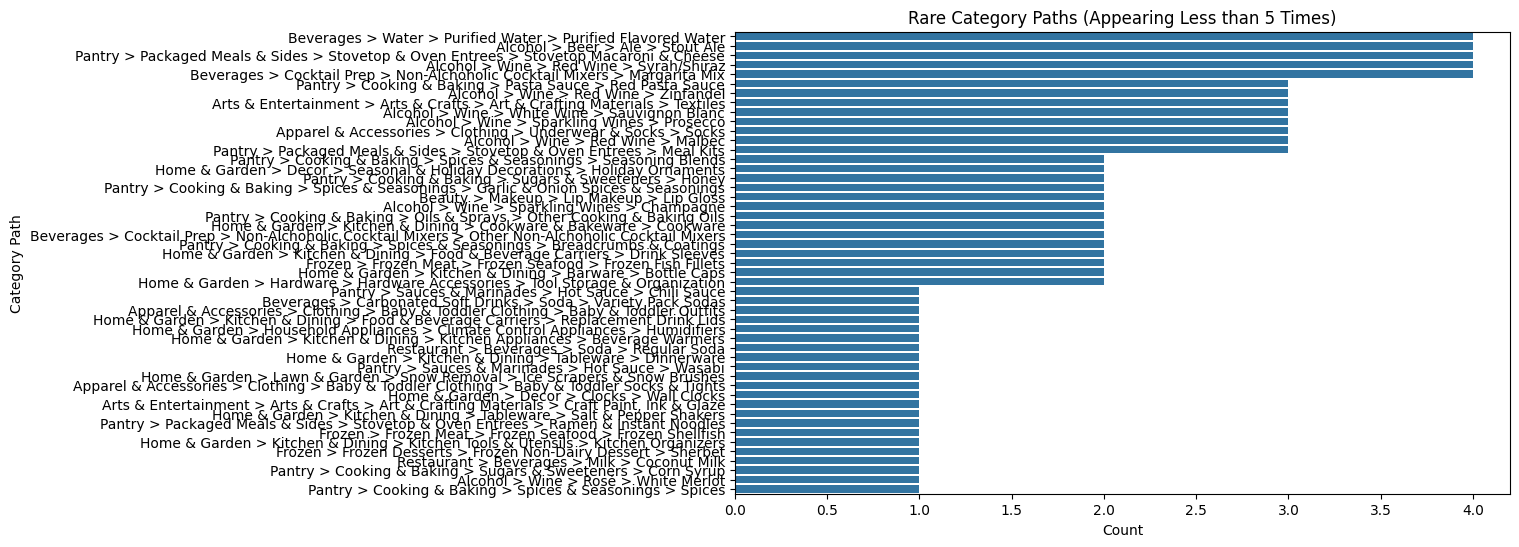

In [ ]:
# 3. Detect Unusual or Broken Hierarchies
# We can define an unusual hierarchy as one where there are many unique subcategories under one category or very few products in a path.
# Rare category paths (appearing less than a threshold count) can be flagged for further investigation.
threshold = 5  # Define a threshold for rare paths
rare_paths = category_path_counts[category_path_counts['count'] < threshold]

print(f"\nRare category paths (appearing less than {threshold} times):")
print(rare_paths)

# Visualize rare category paths
plt.figure(figsize=(10, 6))
sns.barplot(y='category_path', x='count', data=rare_paths)
plt.title(f'Rare Category Paths (Appearing Less than {threshold} Times)')
plt.ylabel('Category Path')
plt.xlabel('Count')
plt.show()

In [ ]:

transactions_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')

# Check for any missing or zero final sales values
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')
transactions_df = transactions_df[transactions_df['FINAL_SALE'] > 0]

# Merge the transactions with the products to get brand and categories
merged_df = pd.merge(transactions_df, products_df, on='BARCODE', how='inner')

# Group by brand and sum the total sales for each brand
brand_sales = merged_df.groupby('BRAND')['FINAL_SALE'].sum().reset_index()

# Sort by total sales to find the most sold brand
most_sold_brand = brand_sales.sort_values(by='FINAL_SALE', ascending=False).iloc[0]
most_sold_brand_name = most_sold_brand['BRAND']

print(f"Most sold brand: {most_sold_brand_name}, Total Sales: {most_sold_brand['FINAL_SALE']}")

# Extract the category path for the most sold brand
most_sold_brand_category = merged_df[merged_df['BRAND'] == most_sold_brand_name].iloc[0]

category_path = (
    most_sold_brand_category['CATEGORY_1'] + ' > ' +
    most_sold_brand_category['CATEGORY_2'] + ' > ' +
    most_sold_brand_category['CATEGORY_3'] + ' > ' +
    most_sold_brand_category['CATEGORY_4']
)

print(f"Category Path for {most_sold_brand_name}: {category_path}")


Most sold brand: COCA-COLA, Total Sales: 540036.95
Category Path for COCA-COLA: Beverages > Carbonated Soft Drinks > Cola > Regular Cola


<ipython-input-40-7a75daeb477d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FINAL_SALE', y='BRAND', data=top_5_brands, palette='viridis')


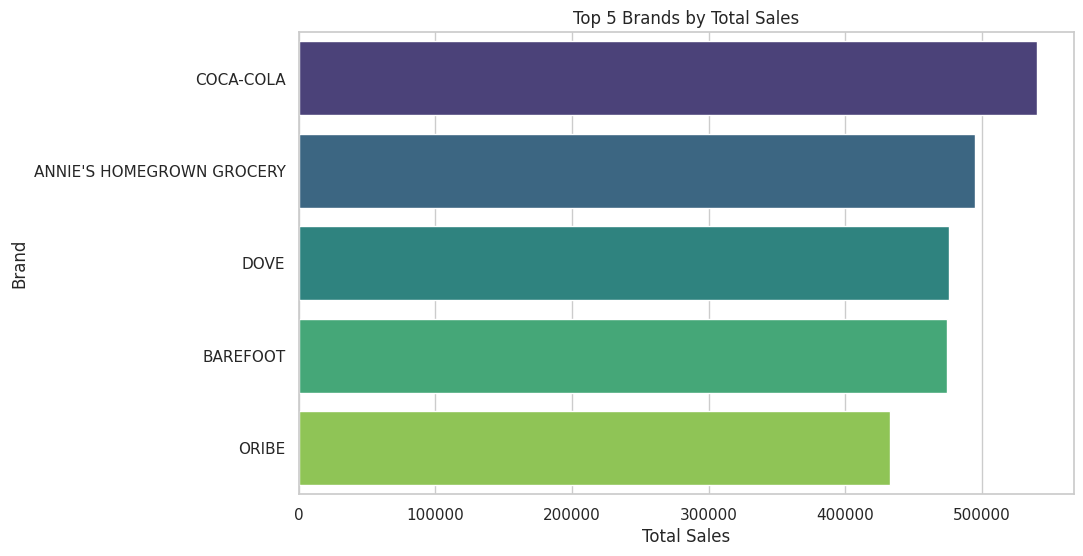

<ipython-input-40-7a75daeb477d>:23: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=[1, 2, 3, 4], y=[1, 1, 1, 1], markers='o', color='blue', scale=2)


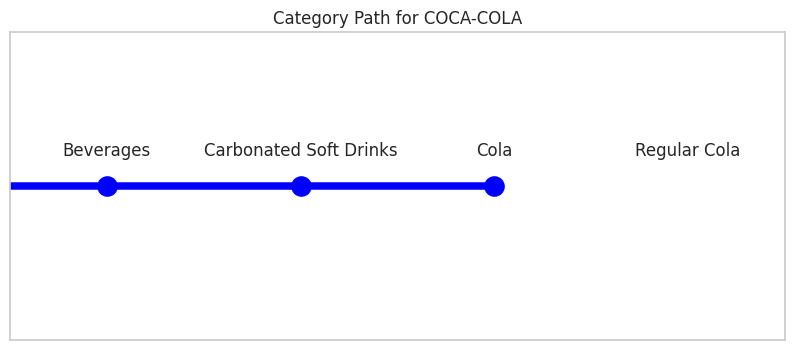

In [ ]:


# Set the style for the plots
sns.set(style="whitegrid")

# Plot the top 5 brands by total sales
top_5_brands = brand_sales.sort_values(by='FINAL_SALE', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='FINAL_SALE', y='BRAND', data=top_5_brands, palette='viridis')
plt.title('Top 5 Brands by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()

# Visualizing the category path for the most sold brand
categories = [
    most_sold_brand_category['CATEGORY_1'],
    most_sold_brand_category['CATEGORY_2'],
    most_sold_brand_category['CATEGORY_3'],
    most_sold_brand_category['CATEGORY_4']
]

plt.figure(figsize=(10, 4))
sns.pointplot(x=[1, 2, 3, 4], y=[1, 1, 1, 1], markers='o', color='blue', scale=2)

for i, category in enumerate(categories):
    plt.text(i+1, 1.02, category, horizontalalignment='center', fontsize=12)

plt.xlim(0.5, 4.5)
plt.ylim(0.9, 1.1)
plt.title(f"Category Path for {most_sold_brand_name}")
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
# Check for missing values
missing_values = transactions_df.isnull().sum()

In [ ]:
# Identify inconsistent BARCODE formats (exponential notation and regular integers)
barcode_exponential = transactions_df['BARCODE'].apply(lambda x: isinstance(x, str) and 'E+' in x)

# Check for inconsistent FINAL_QUANTITY values ('zero' instead of 0)
final_quantity_zero = transactions_df[transactions_df['FINAL_QUANTITY'] == 'zero']

# Standardize date formats (convert PURCHASE_DATE to ISO 8601)
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')

# Check for potential outliers in FINAL_SALE
final_sale_outliers = transactions_df[transactions_df['FINAL_SALE'].apply(lambda x: pd.to_numeric(x, errors='coerce') > 20)]

In [ ]:

# Display results
print("Missing Values:\n", missing_values)
print("\nInconsistent BARCODE Formats:\n", transactions_df[barcode_exponential])
print("\nFINAL_QUANTITY Values Labeled 'zero':\n", final_quantity_zero)
print("\nPotential FINAL_SALE Outliers:\n", final_sale_outliers)

Missing Values:
 RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           3996
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

Inconsistent BARCODE Formats:
 Empty DataFrame
Columns: [RECEIPT_ID, PURCHASE_DATE, SCAN_DATE, STORE_NAME, USER_ID, BARCODE, FINAL_QUANTITY, FINAL_SALE]
Index: []

FINAL_QUANTITY Values Labeled 'zero':
                                  RECEIPT_ID PURCHASE_DATE  \
1      0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
3      000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
5      0002d8cd-1701-4cdd-a524-b70402e2dbc0    2024-06-24   
7      00096c49-8b04-42f9-88ce-941c5e06c4a7    2024-08-19   
9      0010d87d-1ad2-4e5e-9a25-cec736919d15    2024-08-04   
...                                     ...           ...   
24991  ffebda11-ff18-46e0-8455-cef0679558cc    2024-08-03   
24993  ffef10cb-52ac-4123-aa87-0d65e85b6ef7    2024-07-21   
24995  fff60bb7-bf93-4e6b-8055-4d

<ipython-input-46-d4b8ae7f6a47>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=customer_counts, palette='viridis')


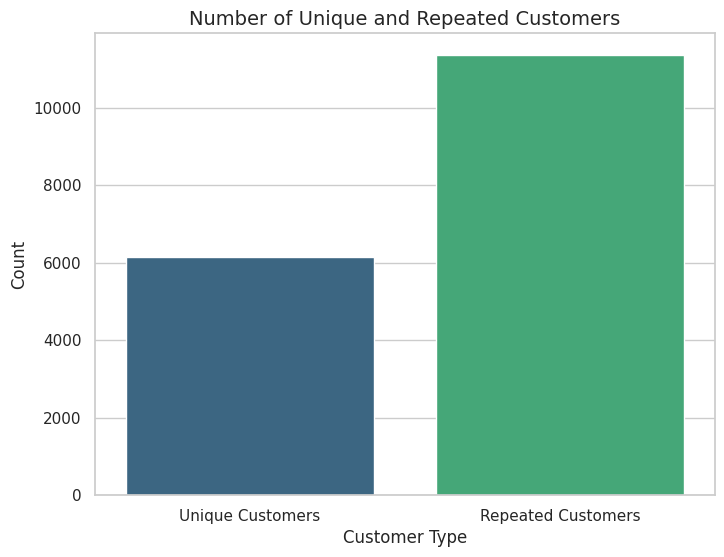

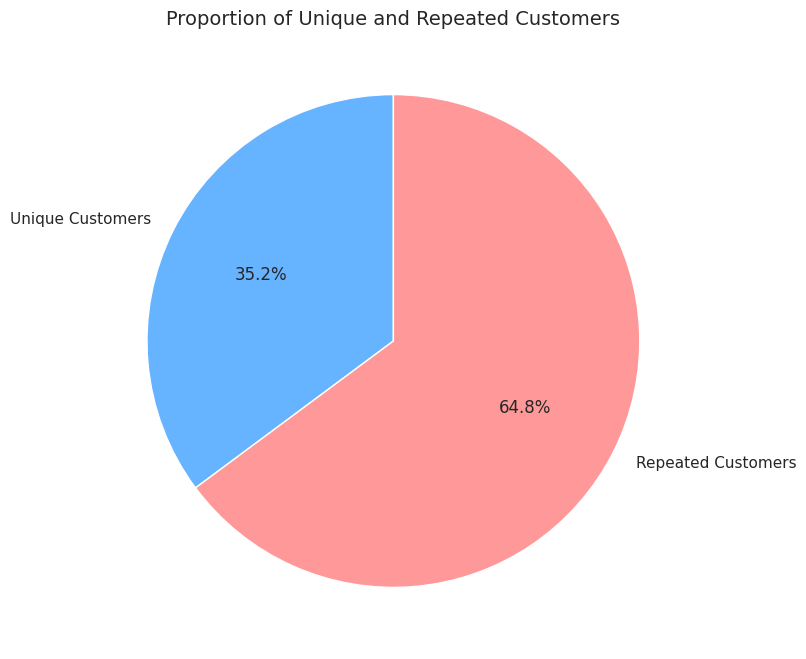

In [ ]:
# Group the data by USER_ID and count occurrences of each USER_ID
user_id_counts = transactions_df.groupby('USER_ID').size().reset_index(name='counts')

# Find repeated customers (those with counts > 1)
repeated_customers = user_id_counts[user_id_counts['counts'] > 1]

# Find unique customers (those with counts == 1)
unique_customers = user_id_counts[user_id_counts['counts'] == 1]

# Plotting the number of unique and repeated customers using a bar chart
customer_counts = [len(unique_customers), len(repeated_customers)]
labels = ['Unique Customers', 'Repeated Customers']

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=customer_counts, palette='viridis')
plt.title('Number of Unique and Repeated Customers', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Customer Type', fontsize=12)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(customer_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Unique and Repeated Customers', fontsize=14)
plt.show()

In [ ]:
# Calculate time difference
transactions_df['TIME_DIFF'] = transactions_df['SCAN_DATE'] - transactions_df['PURCHASE_DATE']

# Convert time difference to seconds for easier analysis
transactions_df['TIME_DIFF_SECONDS'] = transactions_df['TIME_DIFF'].dt.total_seconds()

# Show time difference statistics
print(transactions_df['TIME_DIFF'].describe())


count                        37020
mean     2 days 15:01:46.566631118
std      3 days 09:28:23.021200437
min       -1 days +05:45:31.577000
25%         0 days 15:59:03.613000
50%         1 days 07:10:26.394000
75%         3 days 07:02:22.052250
max        32 days 18:39:35.302000
Name: TIME_DIFF, dtype: object


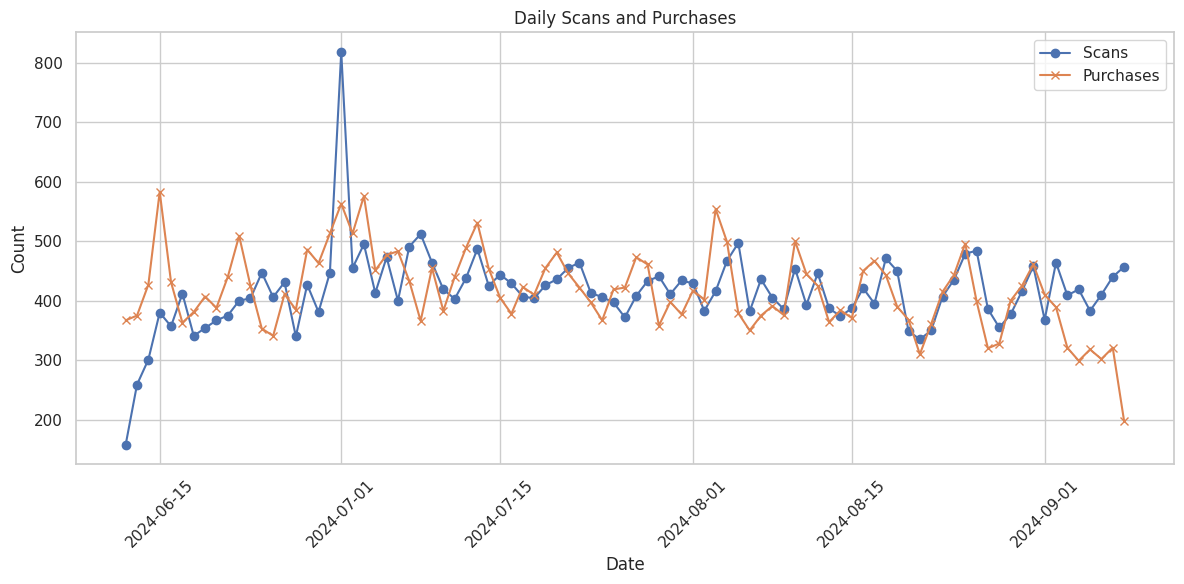

In [ ]:
# Count scans and purchases per day
scans_per_day = transactions_df['SCAN_DATE'].dt.date.value_counts().sort_index()
purchases_per_day = transactions_df['PURCHASE_DATE'].dt.date.value_counts().sort_index()

# Visualize scan and purchase frequency
plt.figure(figsize=(12, 6))
plt.plot(scans_per_day.index, scans_per_day.values, marker='o', label='Scans')
plt.plot(purchases_per_day.index, purchases_per_day.values, marker='x', label='Purchases')
plt.title('Daily Scans and Purchases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Identify anomalies where SCAN_DATE is before PURCHASE_DATE
anomalies = transactions_df[transactions_df['SCAN_DATE'] < transactions_df['PURCHASE_DATE']]
print("Anomalies (SCAN_DATE before PURCHASE_DATE):")
print(anomalies)


Anomalies (SCAN_DATE before PURCHASE_DATE):
                                 RECEIPT_ID PURCHASE_DATE  \
51     008c1dcc-0f96-4b04-98c8-2a2bb63ef89d    2024-07-21   
455    04a320ed-2903-45e5-8fd7-6eaf08daef32    2024-06-29   
675    06ce3da3-a588-4c37-93b4-0b6d11e42704    2024-06-22   
4159   2a6cdb6d-3a4f-49c3-ae91-cca5c272ff32    2024-06-18   
5343   3708996b-2961-4314-915a-eb87f3135a5d    2024-06-29   
...                                     ...           ...   
46034  08d0e78f-3e63-40a3-8eb0-73fdf76da52c    2024-06-22   
46539  718aa730-b62f-4e18-8dba-1d7105dac341    2024-09-05   
46941  af2b818f-4a92-4e98-958c-65f2ce0b271d    2024-06-15   
47653  72bb7b71-d958-4a46-ae62-43abdeb0e693    2024-06-15   
47837  99c2e8dc-9dc7-4267-9342-0b19c3fb35a0    2024-06-15   

                    SCAN_DATE            STORE_NAME                   USER_ID  \
51    2024-07-20 19:54:23.133               WALMART  5dc24cdb682fcf1229d04bd6   
455   2024-06-28 11:03:31.783  DOLLAR GENERAL STORE  62855f67

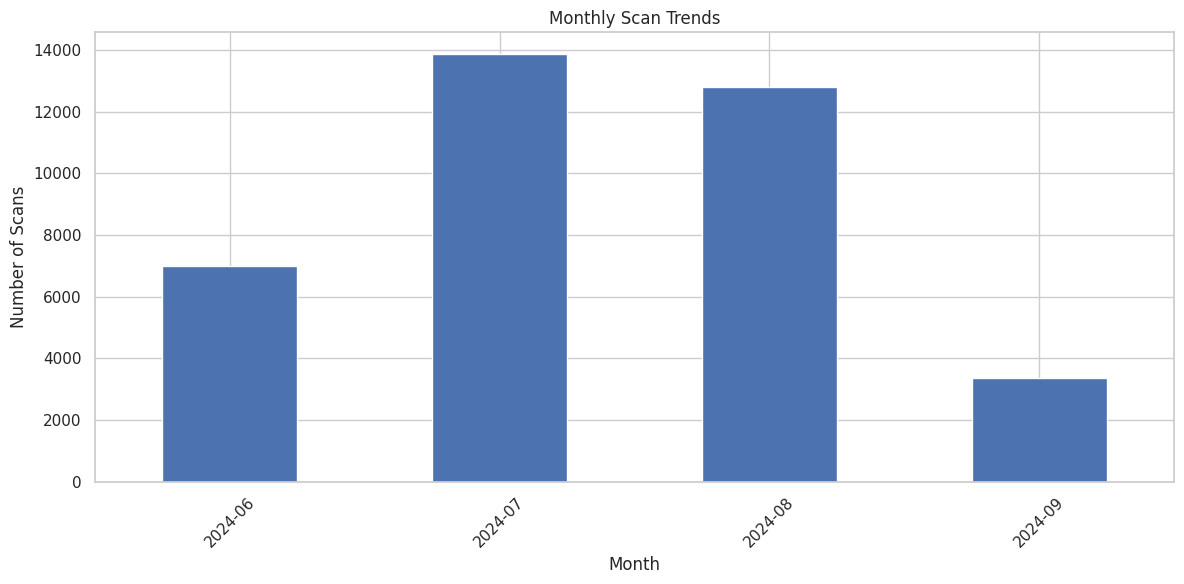

In [ ]:
# Visualize trends over time
plt.figure(figsize=(12, 6))
transactions_df['MONTH'] = transactions_df['SCAN_DATE'].dt.to_period('M')

monthly_trends = transactions_df.groupby('MONTH').count()['SCAN_DATE']
monthly_trends.plot(kind='bar', title='Monthly Scan Trends')
plt.xlabel('Month')
plt.ylabel('Number of Scans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate correlation between time difference and other features
correlation = transactions_df[['TIME_DIFF_SECONDS']].corr()
print("Correlation matrix:")
print(correlation)

Correlation matrix:
                   TIME_DIFF_SECONDS
TIME_DIFF_SECONDS                1.0


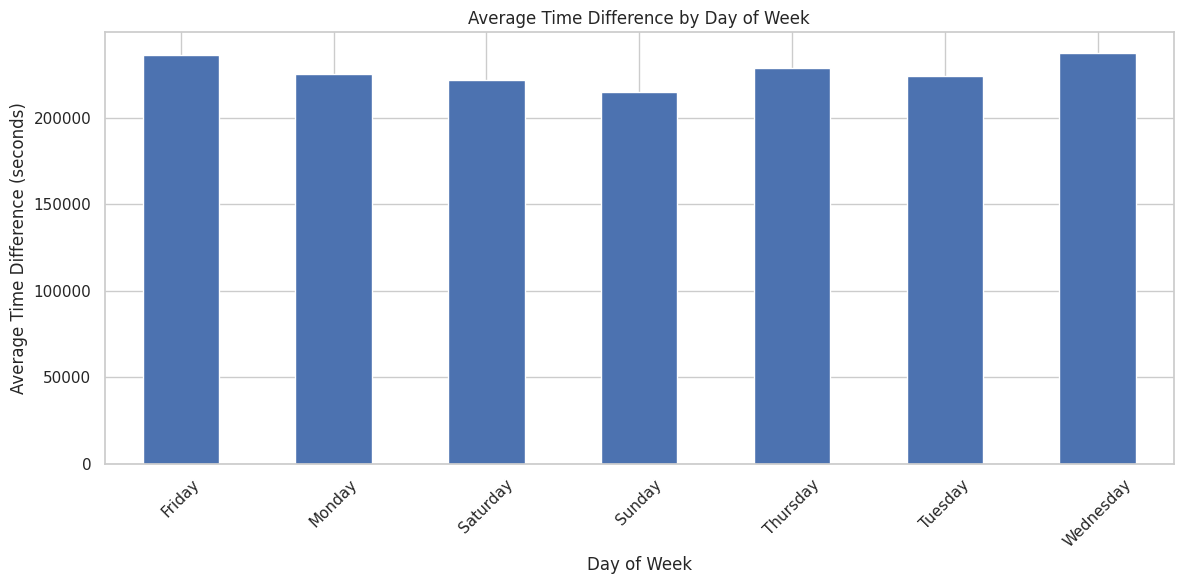

In [ ]:
# Average time difference by day of the week
transactions_df['DAY_OF_WEEK'] = transactions_df['PURCHASE_DATE'].dt.day_name()
avg_time_diff_by_day = transactions_df.groupby('DAY_OF_WEEK')['TIME_DIFF_SECONDS'].mean()

plt.figure(figsize=(12, 6))
avg_time_diff_by_day.plot(kind='bar', title='Average Time Difference by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Time Difference (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-59-4348d61f5ba3>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-59-4348d61f5ba3>:92: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quality_scores = transactions_df.groupby('STORE_NAME').apply(calculate_quality_score)


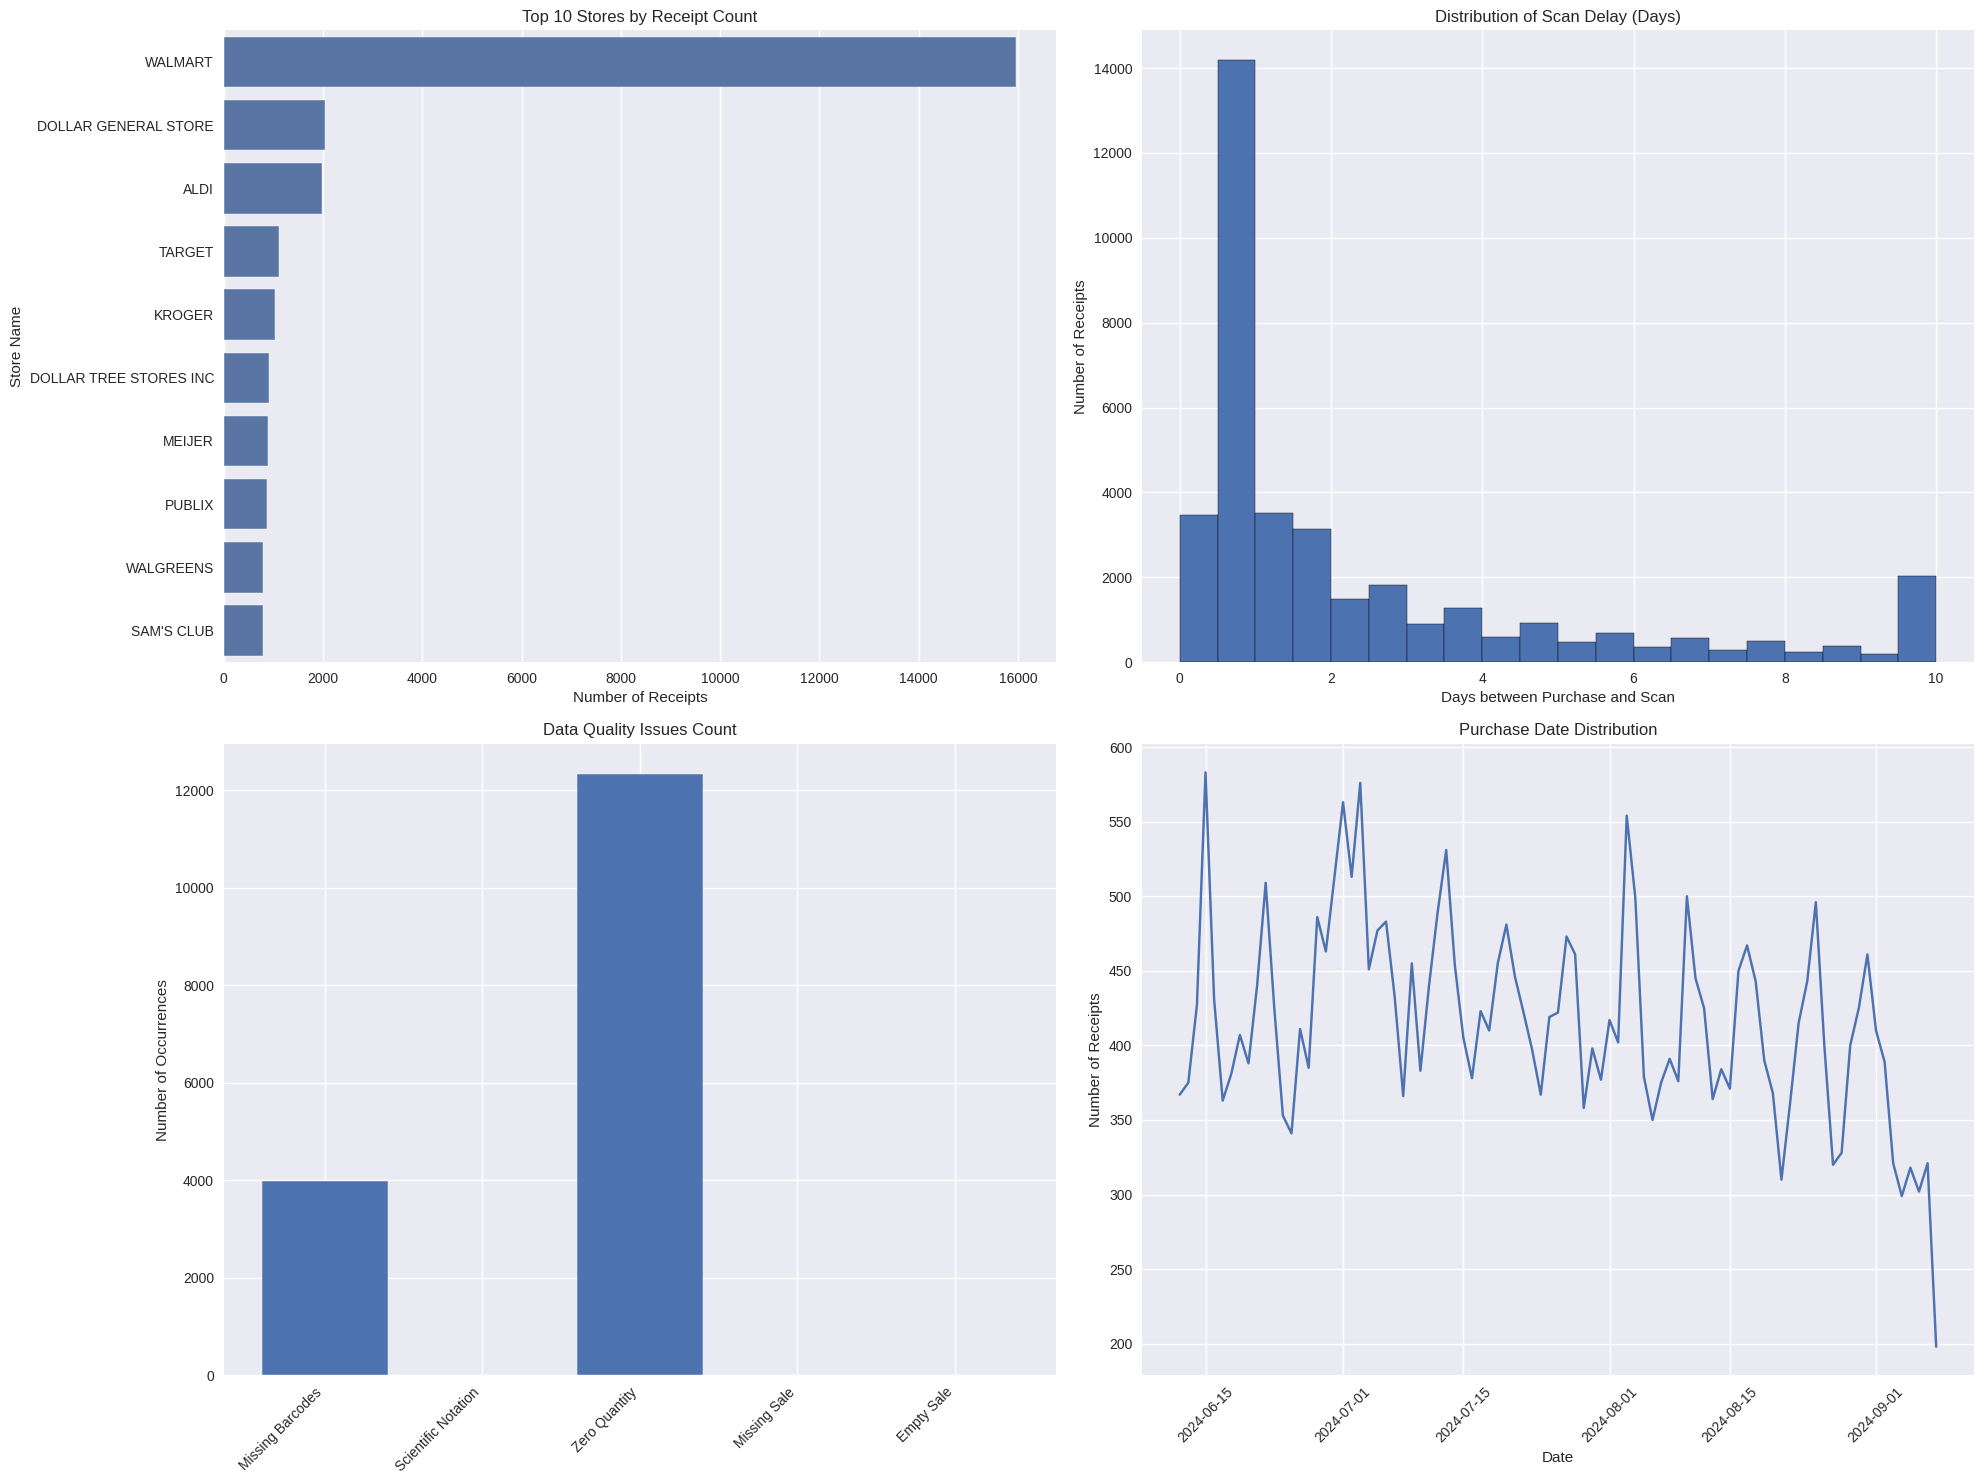

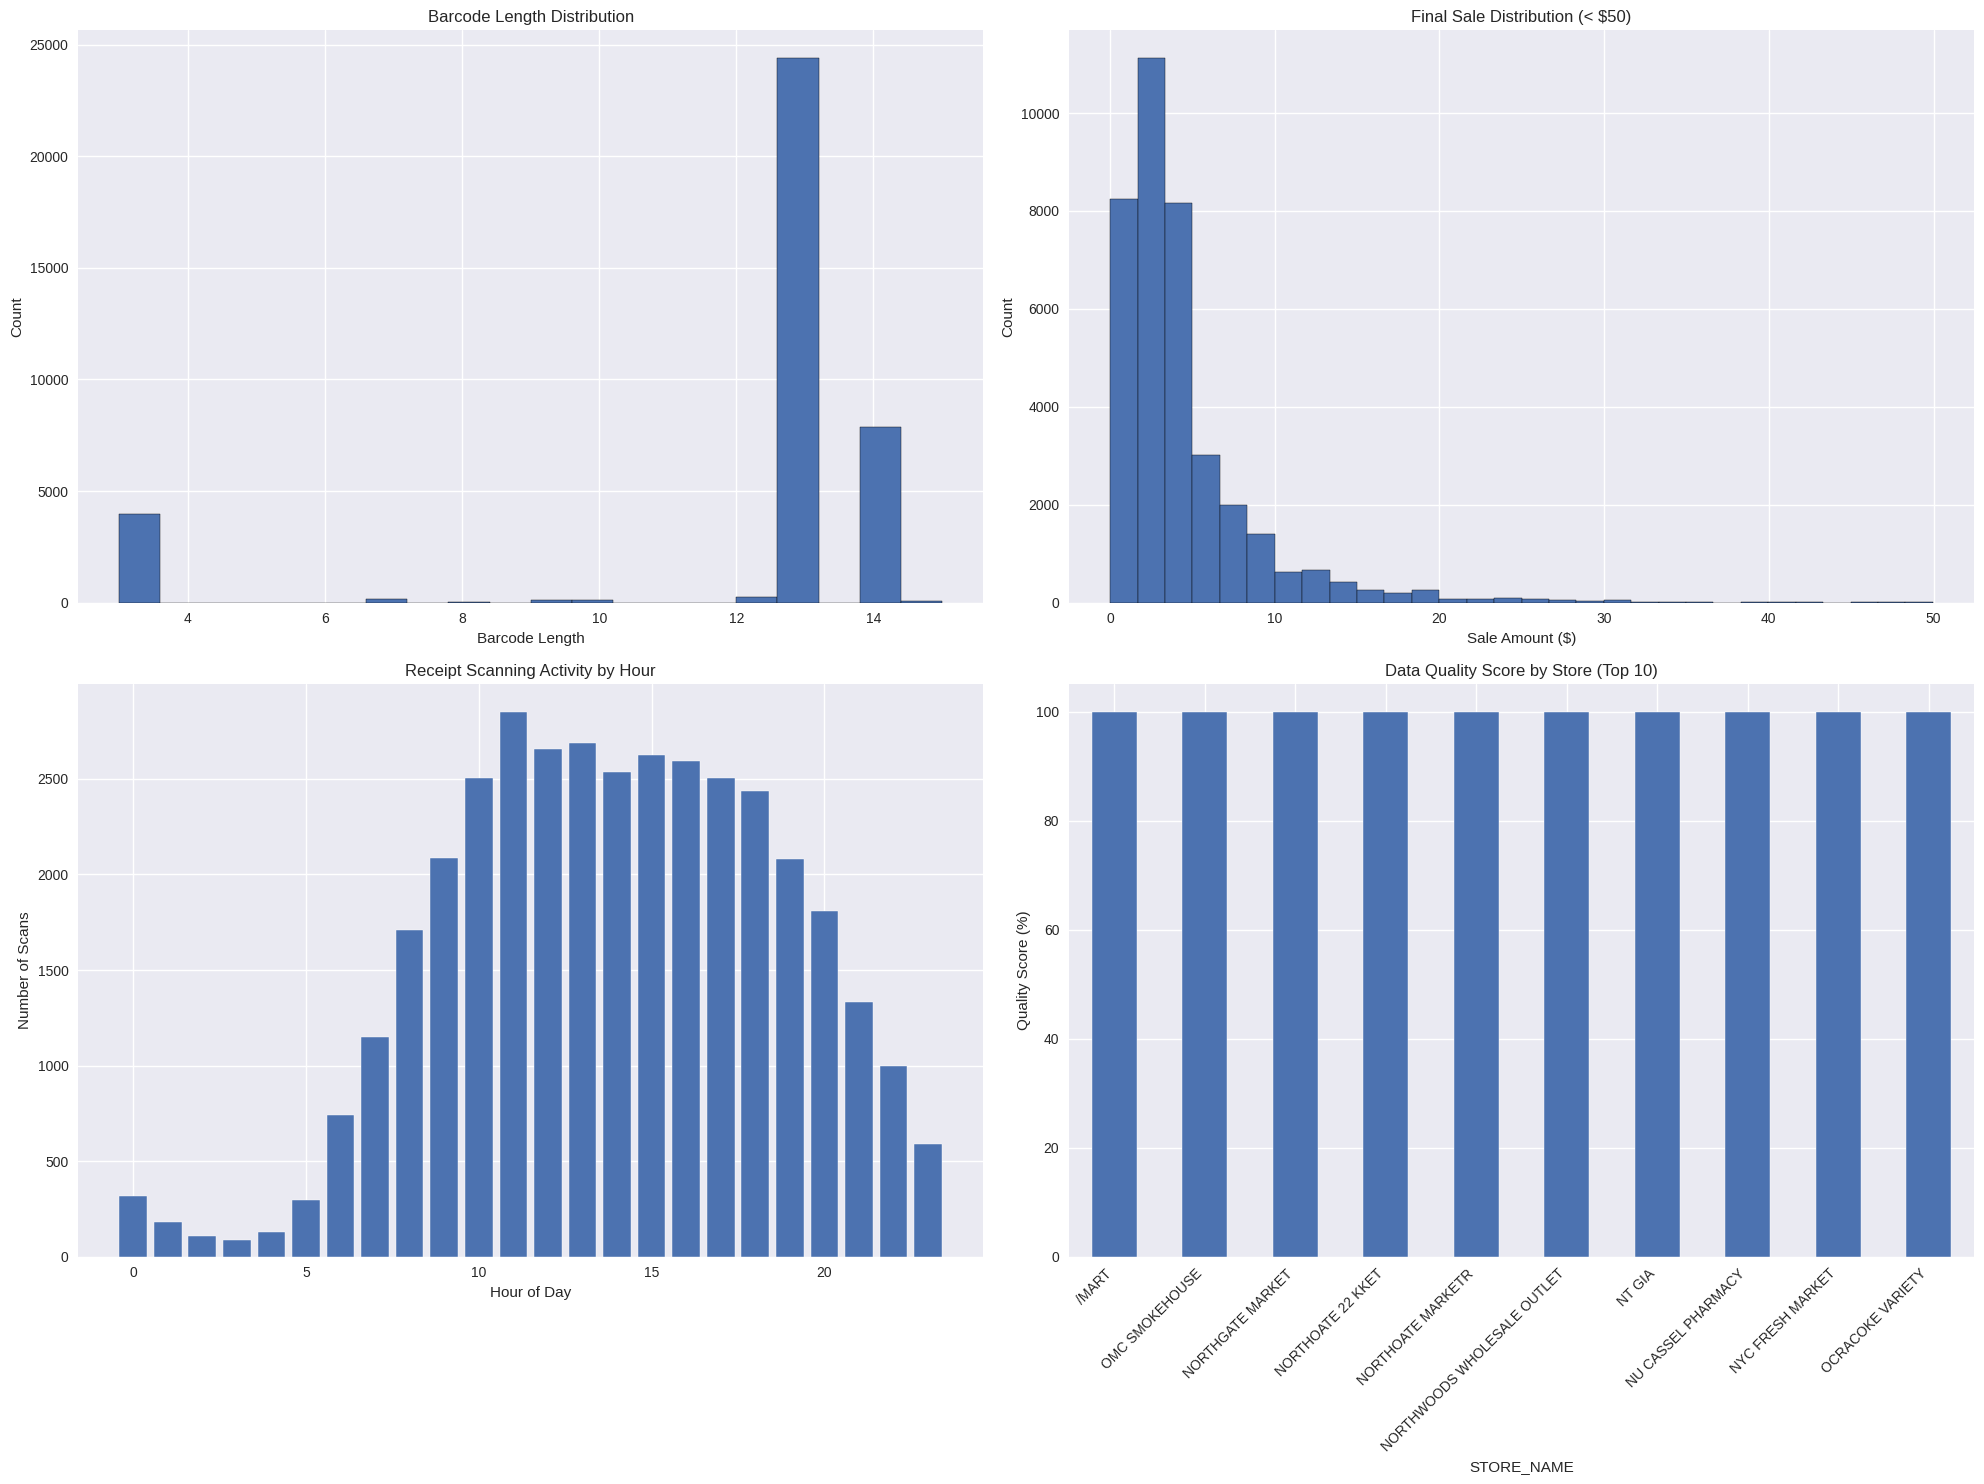

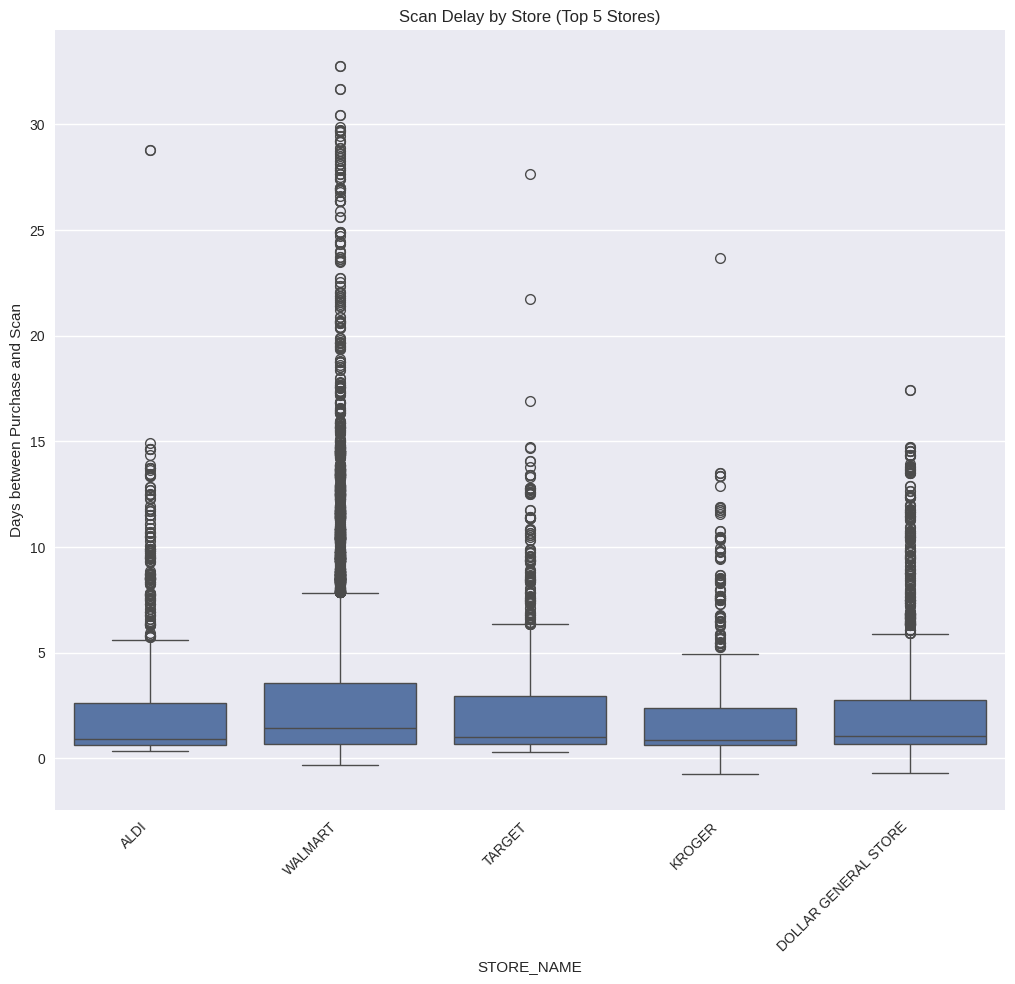

In [ ]:
from datetime import datetime
import numpy as np


# Convert dates to datetime
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], format='%m/%d/%y')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'])

# Calculate time difference between scan and purchase
transactions_df['scan_delay'] = (transactions_df['SCAN_DATE'] - transactions_df['PURCHASE_DATE']).dt.total_seconds() / (24*60*60)

# Create a figure with multiple subplots
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 15))

# 1. Store Distribution
plt.subplot(2, 2, 1)
store_counts = transactions_df['STORE_NAME'].value_counts().head(10)
sns.barplot(x=store_counts.values, y=store_counts.index)
plt.title('Top 10 Stores by Receipt Count', fontsize=12)
plt.xlabel('Number of Receipts')
plt.ylabel('Store Name')

# 2. Scan Delay Distribution
plt.subplot(2, 2, 2)
plt.hist(transactions_df['scan_delay'].clip(0, 10), bins=20, edgecolor='black')
plt.title('Distribution of Scan Delay (Days)', fontsize=12)
plt.xlabel('Days between Purchase and Scan')
plt.ylabel('Number of Receipts')

# 3. Data Quality Issues
plt.subplot(2, 2, 3)
quality_issues = {
    'Missing Barcodes': transactions_df['BARCODE'].isna().sum(),
    'Scientific Notation': len(transactions_df[transactions_df['BARCODE'].astype(str).str.contains('E', na=False)]),
    'Zero Quantity': len(transactions_df[transactions_df['FINAL_QUANTITY'] == 'zero']),
    'Missing Sale': transactions_df['FINAL_SALE'].isna().sum(),
    'Empty Sale': (transactions_df['FINAL_SALE'] == ' ').sum()
}
plt.bar(quality_issues.keys(), quality_issues.values())
plt.xticks(rotation=45, ha='right')
plt.title('Data Quality Issues Count', fontsize=12)
plt.ylabel('Number of Occurrences')

# 4. Purchase Date Distribution
plt.subplot(2, 2, 4)
transactions_df['PURCHASE_DATE'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Purchase Date Distribution', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Number of Receipts')
plt.xticks(rotation=45)

plt.tight_layout()

# Create a new figure for more detailed analysis
fig2 = plt.figure(figsize=(20, 15))

# 5. Barcode Length Distribution
plt.subplot(2, 2, 1)
barcode_lengths = transactions_df['BARCODE'].astype(str).str.len()
plt.hist(barcode_lengths[barcode_lengths < 20], bins=20, edgecolor='black')
plt.title('Barcode Length Distribution', fontsize=12)
plt.xlabel('Barcode Length')
plt.ylabel('Count')

# 6. Final Sale Distribution
plt.subplot(2, 2, 2)
sales = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')
plt.hist(sales[sales < 50], bins=30, edgecolor='black')
plt.title('Final Sale Distribution (< $50)', fontsize=12)
plt.xlabel('Sale Amount ($)')
plt.ylabel('Count')

# 7. Store Activity by Hour
plt.subplot(2, 2, 3)
transactions_df['hour'] = transactions_df['SCAN_DATE'].dt.hour
hourly_activity = transactions_df['hour'].value_counts().sort_index()
plt.bar(hourly_activity.index, hourly_activity.values)
plt.title('Receipt Scanning Activity by Hour', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Scans')

# 8. Quality Score by Store
plt.subplot(2, 2, 4)
def calculate_quality_score(store_group):
    total_records = len(store_group)
    missing_barcodes = store_group['BARCODE'].isna().sum()
    missing_sales = store_group['FINAL_SALE'].isna().sum()
    scientific_notation = len(store_group[store_group['BARCODE'].astype(str).str.contains('E', na=False)])
    return 100 * (1 - (missing_barcodes + missing_sales + scientific_notation) / (total_records * 3))

quality_scores = transactions_df.groupby('STORE_NAME').apply(calculate_quality_score)
quality_scores.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Data Quality Score by Store (Top 10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quality Score (%)')

plt.tight_layout()

# Additional Analysis Figure
fig3 = plt.figure(figsize=(20, 10))

# 9. Time Gap Analysis
plt.subplot(1, 2, 1)
sns.boxplot(x='STORE_NAME', y='scan_delay', data=transactions_df[transactions_df['STORE_NAME'].isin(store_counts.head().index)])
plt.title('Scan Delay by Store (Top 5 Stores)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Days between Purchase and Scan')



plt.tight_layout()

# Save all figures
fig.savefig('data_analysis_1.png')
fig2.savefig('data_analysis_2.png')
fig3.savefig('data_analysis_3.png')

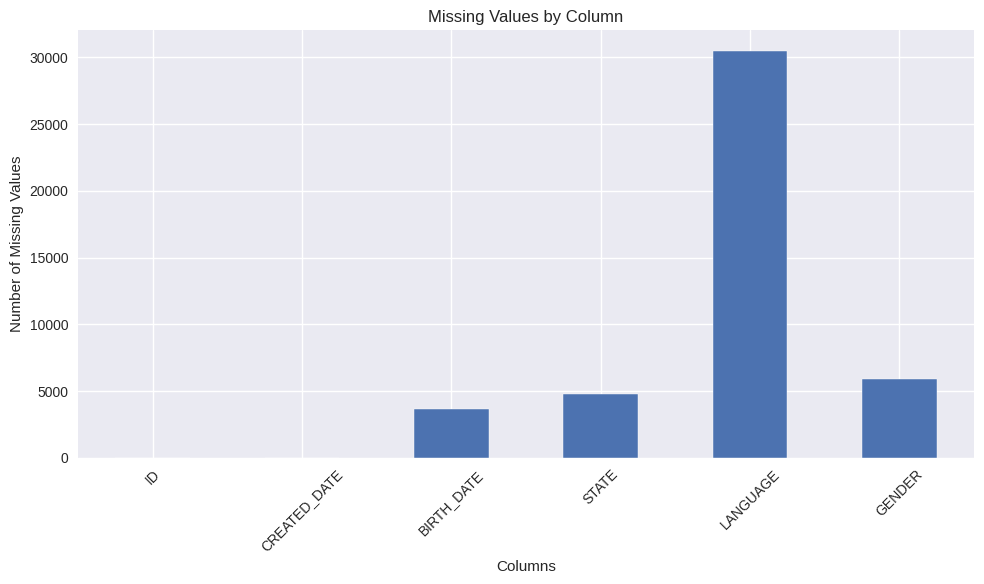

In [ ]:
# Read the data
df = pd.read_csv('USER_TAKEHOME.csv')

# 1. Missing Values Analysis
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-79-a73063cd0da1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GENDER', palette='viridis')


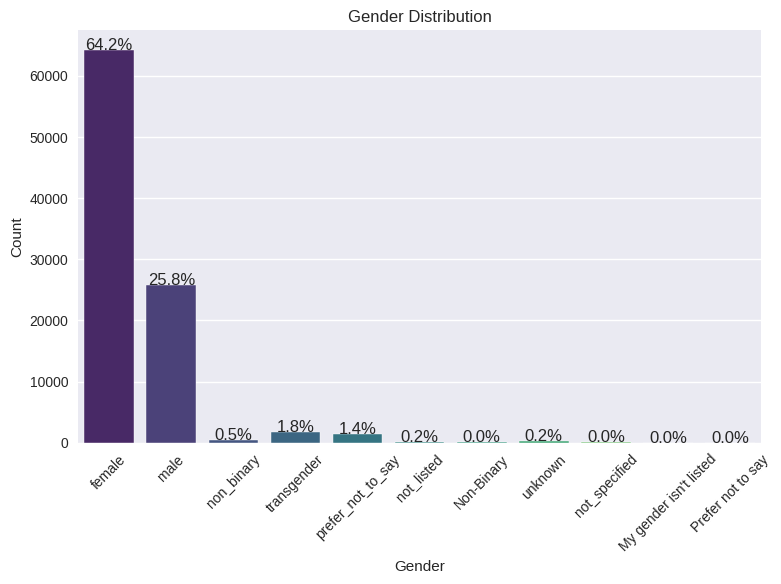

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GENDER', palette='viridis')

# Add percentage annotations
total = len(df)
for patch in plt.gca().patches:
    percentage = f'{100 * patch.get_height() / total:.1f}%'
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5,
             percentage, ha='center', fontsize=12)

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Tilt the x-axis labels
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.tight_layout()
plt.show()





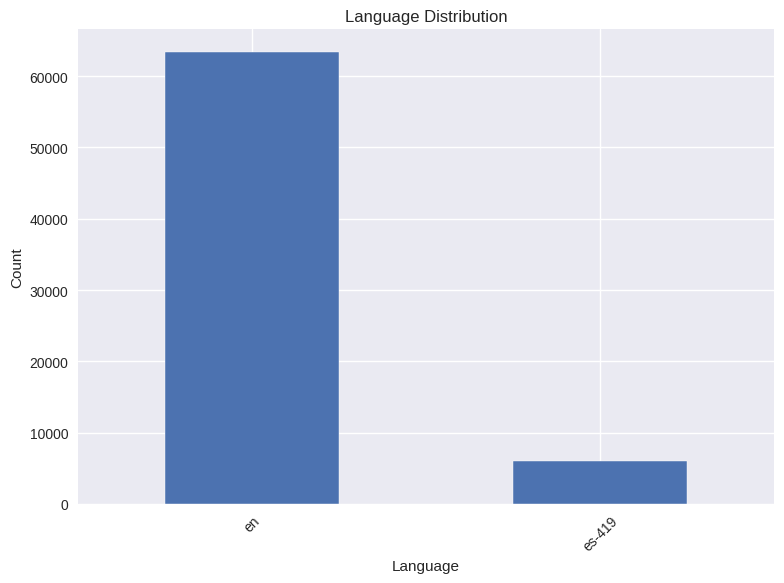

In [ ]:
# 3. Language Distribution
plt.figure(figsize=(8, 6))
df['LANGUAGE'].value_counts().plot(kind='bar')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

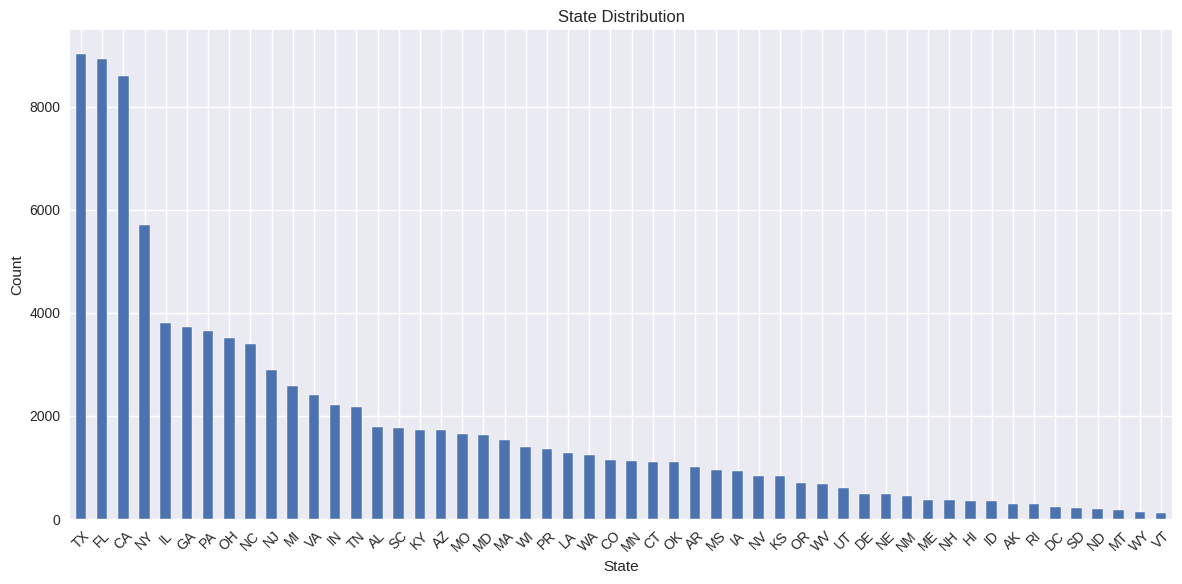

In [ ]:
# 4. State Distribution
plt.figure(figsize=(12, 6))
df['STATE'].value_counts().plot(kind='bar')
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


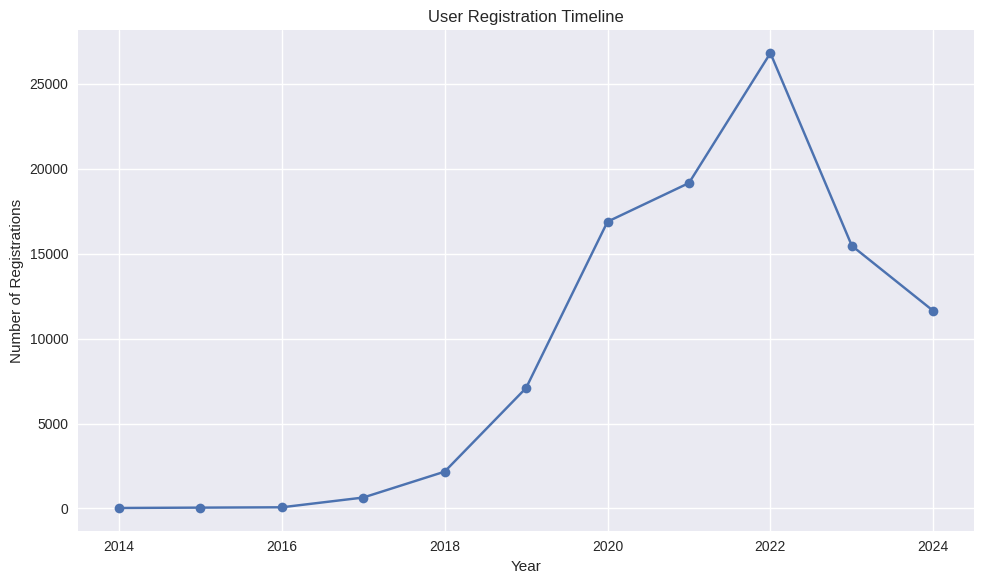

In [ ]:

# 5. Registration Timeline
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])
df['created_year'] = df['CREATED_DATE'].dt.year

plt.figure(figsize=(10, 6))
df['created_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('User Registration Timeline')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.tight_layout()
plt.show()

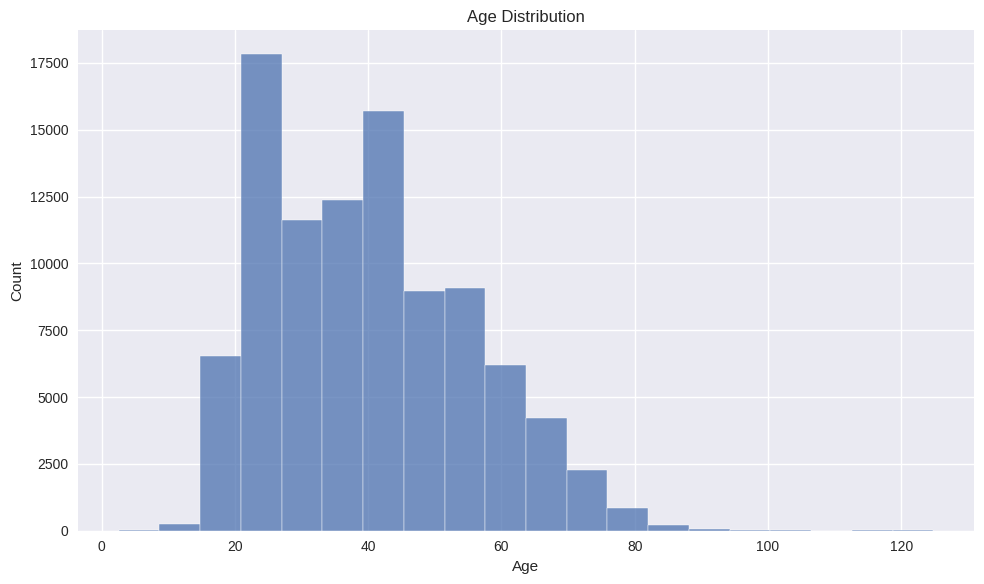

In [ ]:
# Ensure BIRTH_DATE is timezone-naive
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE']).dt.tz_localize(None)

# Calculate age by subtracting BIRTH_DATE from the current date and converting to years
df['age'] = (pd.Timestamp.now().tz_localize(None) - df['BIRTH_DATE']).dt.days / 365.25

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [ ]:

# Print Data Quality Summary
print("\nData Quality Summary:")
print("-" * 50)
print(f"Total number of records: {len(df)}")
print("\nMissing values:")
print(df.isnull().sum())
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Data Quality Summary:
--------------------------------------------------
Total number of records: 100000

Missing values:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
created_year        0
dtype: int64

Unique values in each column:
ID: 100000 unique values
CREATED_DATE: 99942 unique values
BIRTH_DATE: 54721 unique values
STATE: 52 unique values
LANGUAGE: 2 unique values
GENDER: 11 unique values
created_year: 11 unique values
